In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [2]:
workouts = pd.read_csv("Workout Tracker.csv")
workouts.head()

,Date,Muscle,Exercise,Set 1,Set 2,Set 3,Set 4,Set 5
0,24/09/2024,Chest,Smith Machine Incline Bench,25*10,25*9,25*8,25*7,NaN
1,24/09/2024,Shoulders,Dumbbell Lateral Raises,10*10,10*10,10*10,10*10,NaN
2,24/09/2024,Triceps,French Dumbbell Press,22*12,22*10,22*8,22*8,NaN
3,24/09/2024,Chest,Dumbbell Flys,12*8,12*8,12*8,NaN,NaN
4,26/09/2024,Biceps,Arm Curl Machine,41*10,41*10,41*8,41*8,NaN


In [3]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      122 non-null    object
 1   Muscle    122 non-null    object
 2   Exercise  122 non-null    object
 3   Set 1     121 non-null    object
 4   Set 2     121 non-null    object
 5   Set 3     114 non-null    object
 6   Set 4     58 non-null     object
 7   Set 5     3 non-null      object
dtypes: object(8)
memory usage: 7.8+ KB


In [4]:
unique_exercises = workouts['Exercise'].unique()
print(unique_exercises)

['Smith Machine Incline Bench' 'Dumbbell Lateral Raises'
 'French Dumbbell Press' 'Dumbbell Flys' 'Arm Curl Machine'
 'Triceps Pushdown' 'Dumbbell Curls ' 'Overhead Tricep Cable' 'Crunches'
 'Lateral Pulldowns' 'Barbell Row' 'Cable Pullover' 'Cable Row' 'RDL'
 'Seated Calf Raises' 'Hack Squat' 'Leg Extensions'
 'Incline Dumbbell Press' 'Machine Flys' 'Prone Leg Curl' 'Squat'
 'Converging Chest Press' 'Leg Press'
 'Back Lower Left Pulled during final set of RDLs'
 'Incline Smith Machine Press' 'Cable Lateral Raises' 'Cable Flys'
 'Triceps Pushdown (dif)' 'Dumbbell Curls' 'Smith Machine Calves'
 'Seated Leg Curls' 'Calf Press' 'Cable Pullover diff' '26' 'Calf Raises'
 'HS Hamstring Curls' 'HS Single Leg Extension' 'Knee Raises'
 'Lateral Raises Machine' 'Cable Bar Bicep Curls' 'Leg Press diff'
 'Tricep Pushdown']


In [5]:
melted_workouts = workouts.melt(id_vars=["Date", "Muscle", "Exercise"], 
                                value_vars=["Set 1", "Set 2", "Set 3", "Set 4", "Set 5"], 
                                var_name="Set", 
                                value_name="Reps")

melted_workouts.sort_values(by="Date", inplace=True)
melted_workouts.dropna(subset=["Reps"], inplace=True)
melted_workouts.head()

,Date,Muscle,Exercise,Set,Reps
62,01/11/2024,Back,Cable Pullover,Set 1,21.6*12
63,01/11/2024,Biceps,Dumbbell Curls,Set 1,18*12
64,01/11/2024,Back,Lateral Pulldowns,Set 1,54.3*8
65,01/11/2024,Biceps,Arm Curl Machine,Set 1,36*10
66,01/11/2024,Abs,Crunches,Set 1,20


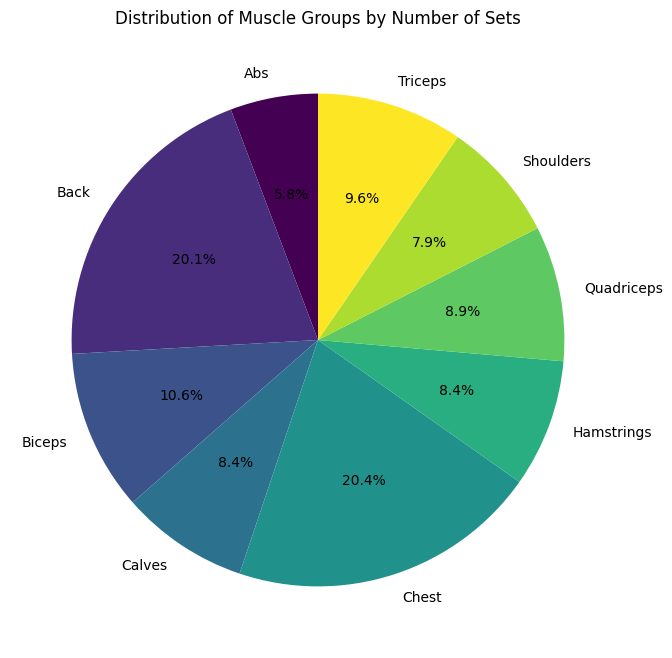

In [6]:
muscle_sets = melted_workouts.groupby("Muscle").size()

plt.figure(figsize=(8, 8))
muscle_sets.plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("Distribution of Muscle Groups by Number of Sets") 
plt.show()

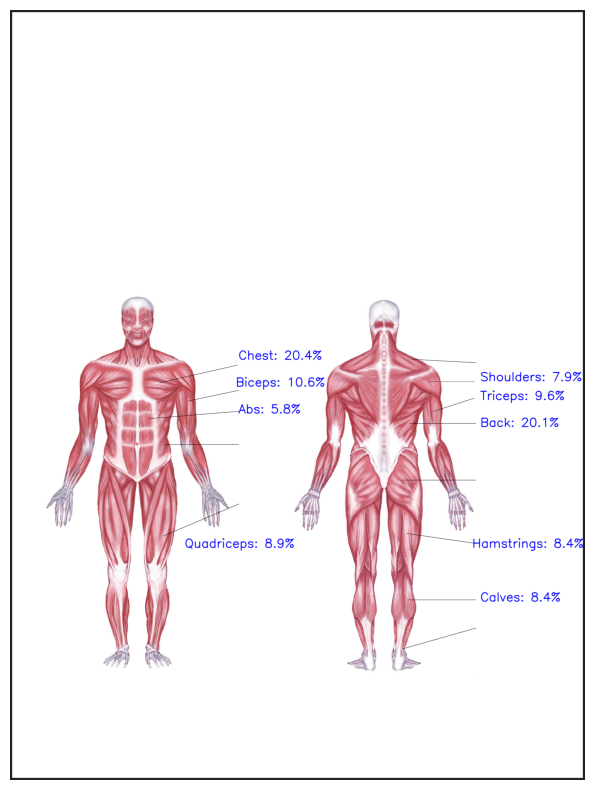

In [7]:
muscle_percentages = (muscle_sets / muscle_sets.sum()) * 100

image = cv2.imread("human_body.png")

positions = {
    "Chest": (850, 1300),
    "Back": (1750, 1550),
    "Biceps": (840, 1400),
    "Quadriceps": (650, 2000),
    "Shoulders": (1750, 1380),
    "Triceps": (1750, 1450),
    "Abs": (850, 1500),
    "Hamstrings": (1720, 2000),
    "Calves": (1750, 2200),
}

for muscle, percentage in muscle_percentages.items():
    position = positions.get(muscle, (50, 50)) 
    text = f"{muscle}: {percentage:.1f}%"
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2, cv2.LINE_AA)  

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

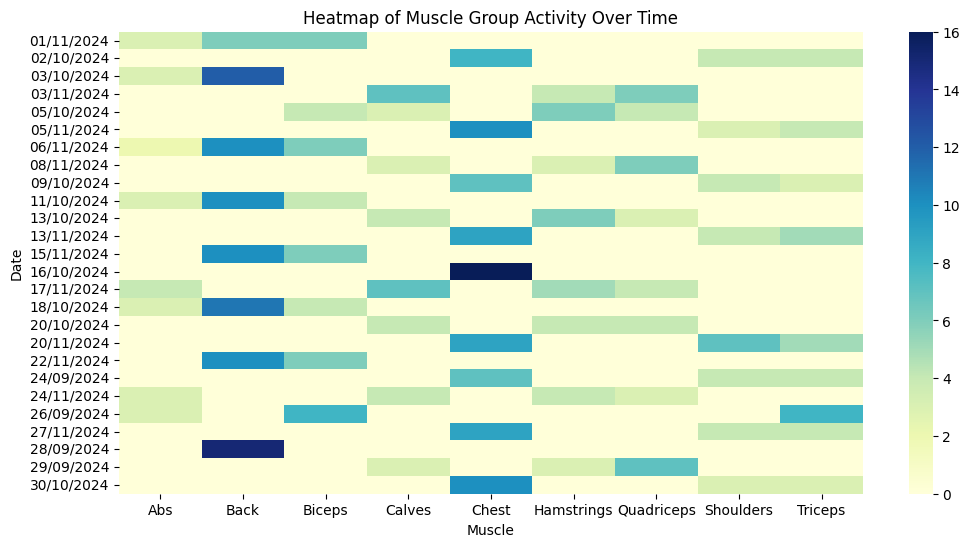

In [8]:
muscle_heatmap_data = melted_workouts.groupby(['Date', 'Muscle']).size().unstack().fillna(0).sort_index(ascending=True)
plt.figure(figsize=(12, 6))
sns.heatmap(muscle_heatmap_data, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Muscle Group Activity Over Time")
plt.xlabel("Muscle")
plt.ylabel("Date")
plt.show()

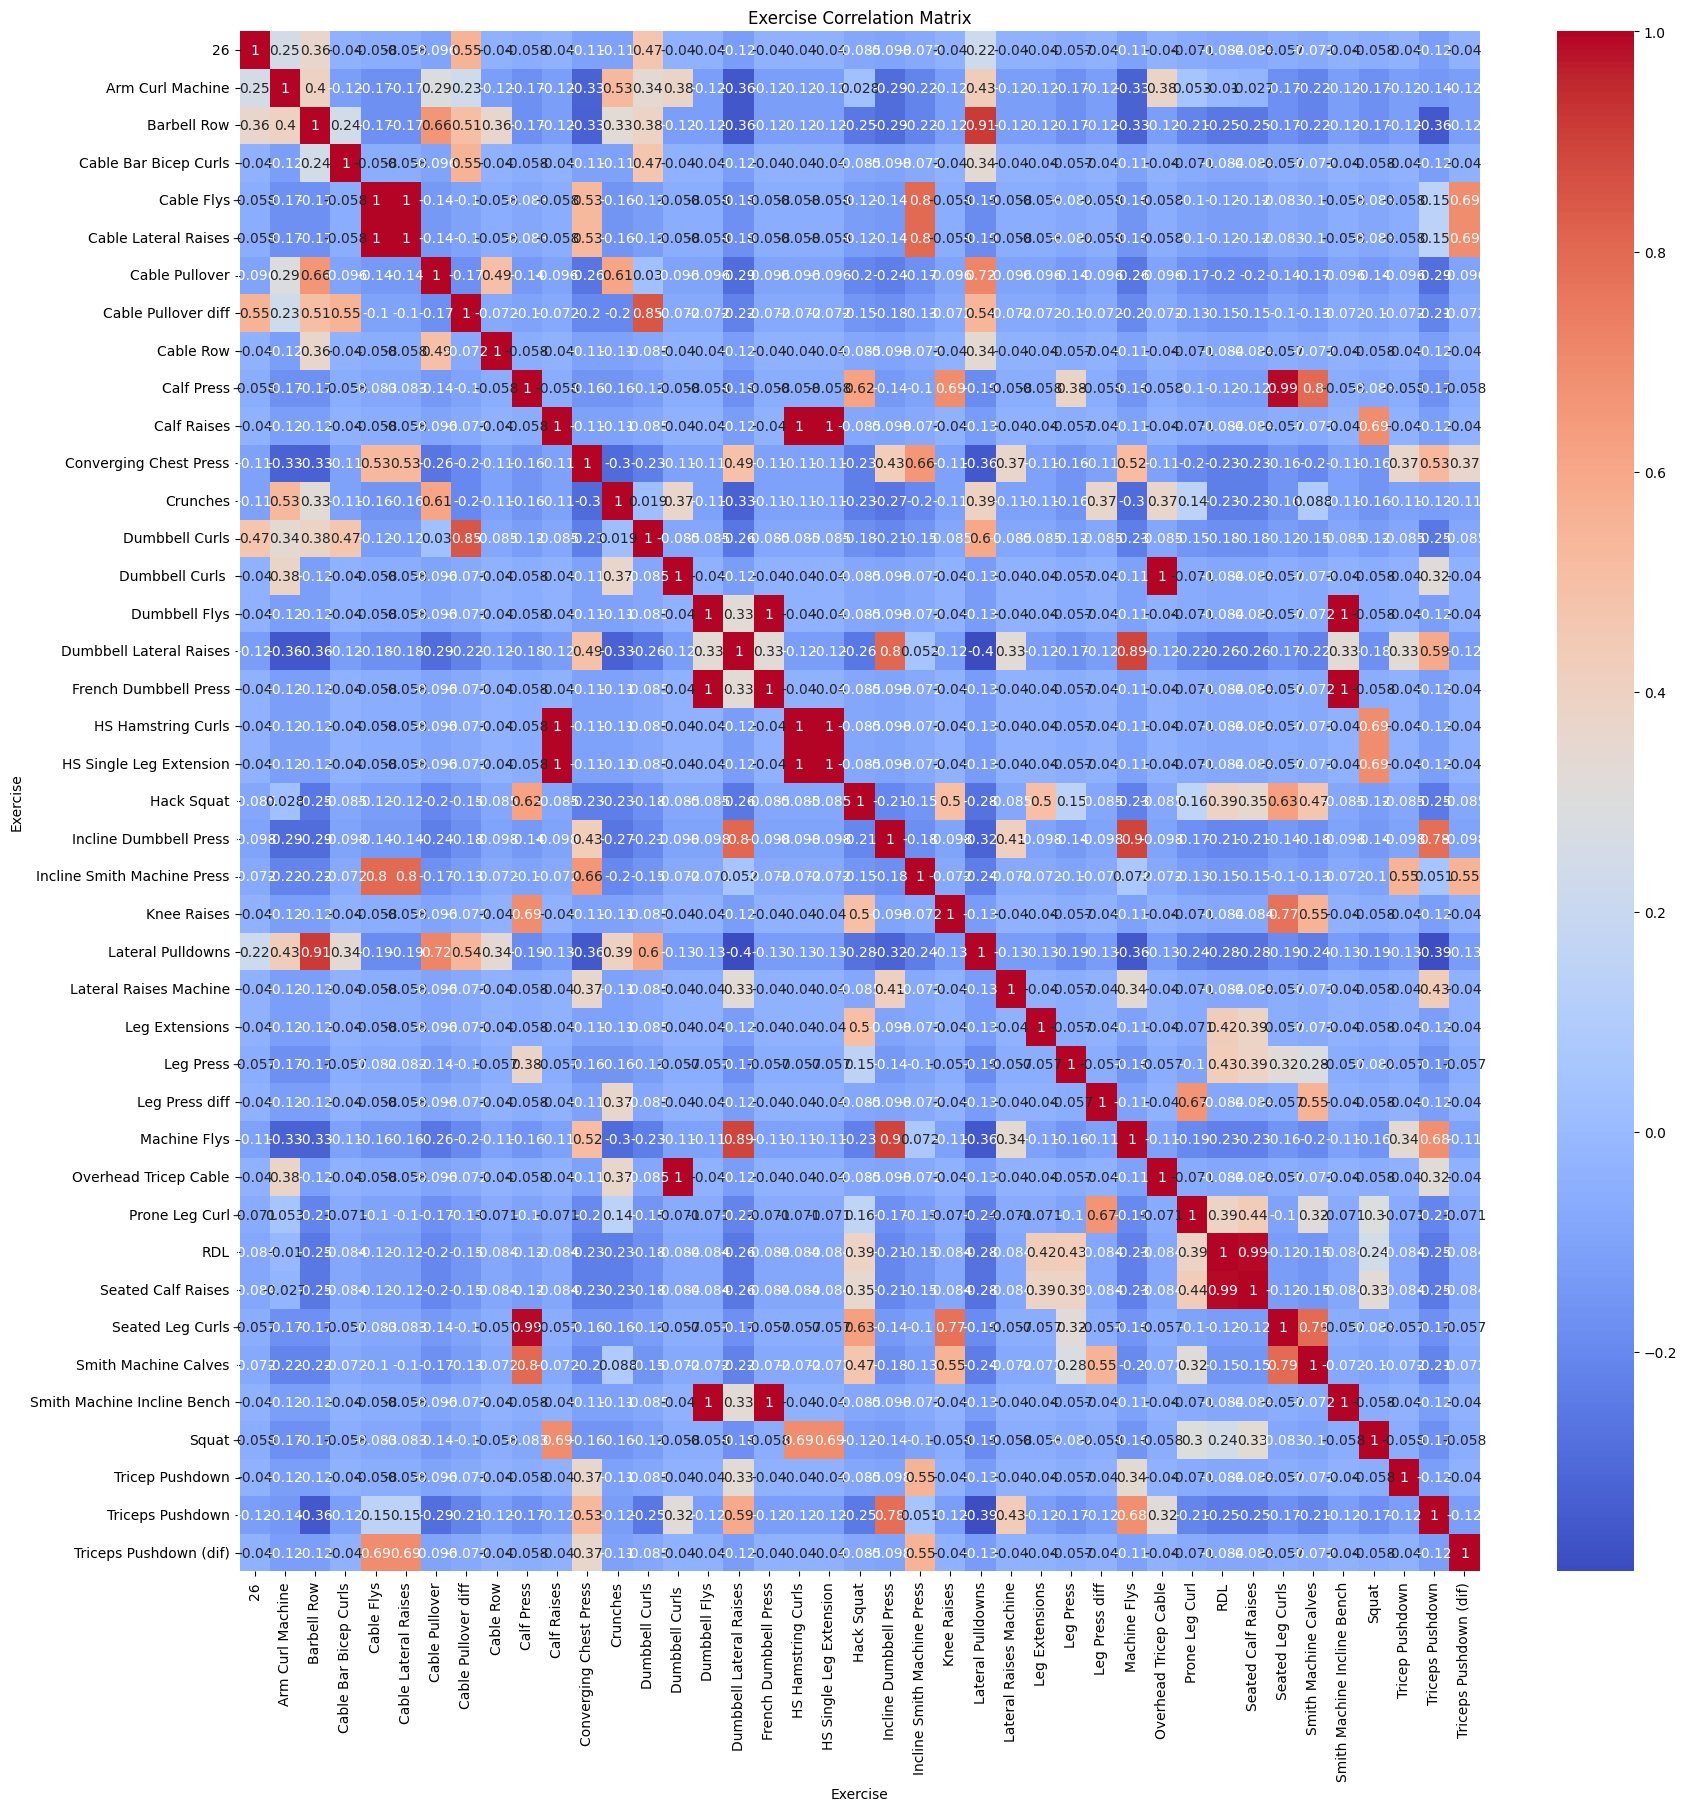

In [9]:
# This looks at which exercises are most often done together

exercise_correlation = pd.crosstab(melted_workouts['Date'], melted_workouts['Exercise'])
corr_matrix = exercise_correlation.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Exercise Correlation Matrix")
plt.show()

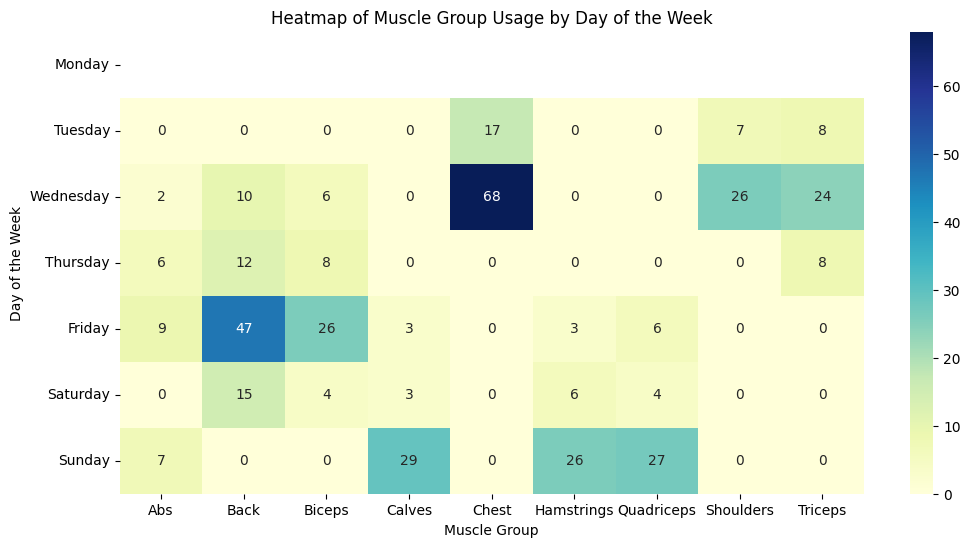

In [10]:
workouts['Date'] = pd.to_datetime(workouts['Date'], dayfirst=True)

workouts['Day of Week'] = workouts['Date'].dt.day_name()

melted_workouts = workouts.melt(id_vars=["Date", "Muscle", "Exercise", "Day of Week"], 
                                value_vars=["Set 1", "Set 2", "Set 3", "Set 4", "Set 5"], 
                                var_name="Set", 
                                value_name="Reps")

melted_workouts.dropna(subset=["Reps"], inplace=True)

muscle_by_day = melted_workouts.groupby(['Day of Week', 'Muscle']).size().unstack().fillna(0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
muscle_by_day = muscle_by_day.reindex(day_order)

plt.figure(figsize=(12, 6))
sns.heatmap(muscle_by_day, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Heatmap of Muscle Group Usage by Day of the Week")
plt.ylabel("Day of the Week")
plt.xlabel("Muscle Group")
plt.show()

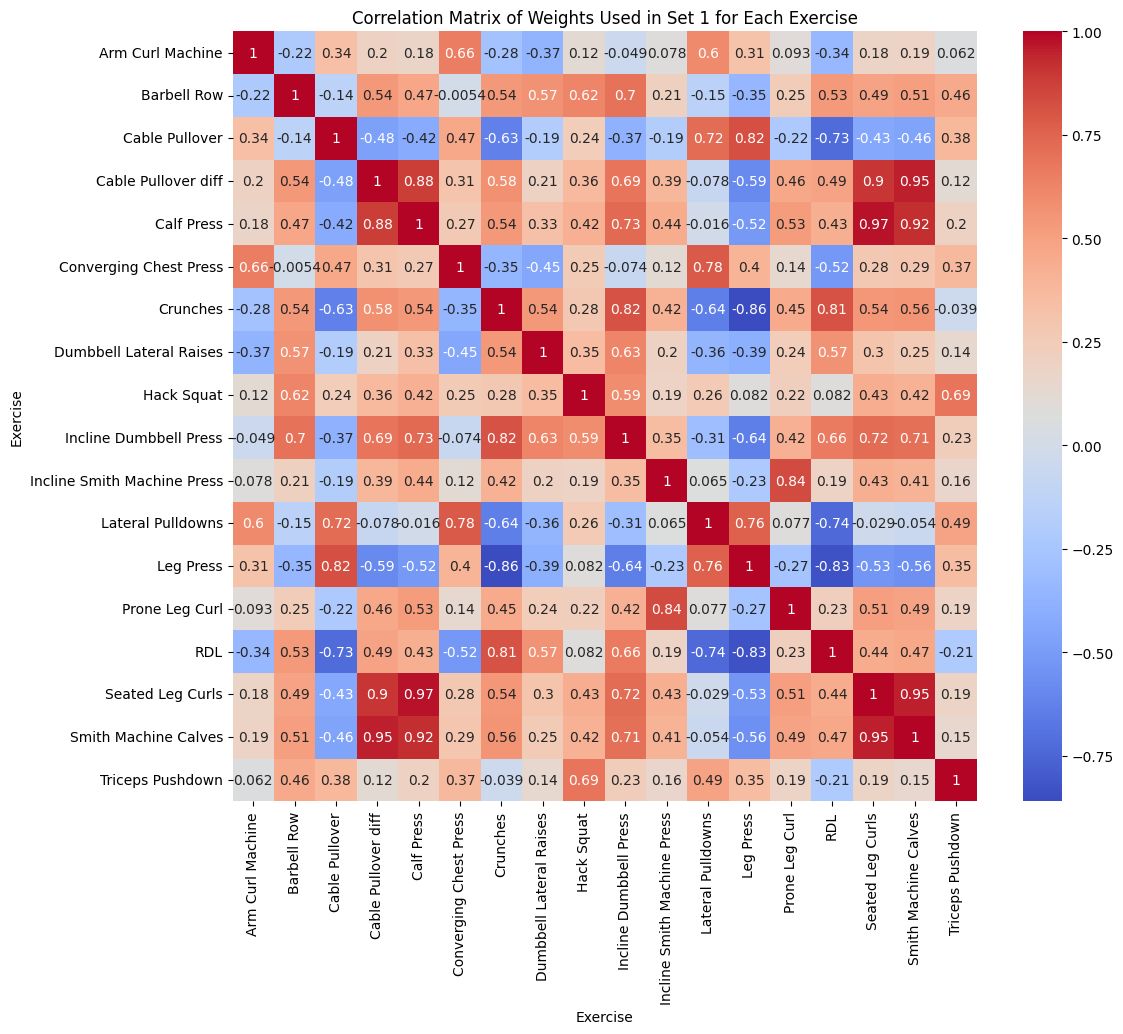

In [11]:
set1_workouts = melted_workouts[melted_workouts['Set'] == 'Set 1'].copy()
set1_workouts['Weight'] = set1_workouts['Reps'].str.extract(r'(\d+\.?\d*)').astype(float)

exercise_weights = set1_workouts.pivot(columns='Exercise', values='Weight')
exercise_weights.ffill(inplace=True)
exercise_weights.bfill(inplace=True)

constant_columns = [col for col in exercise_weights.columns if exercise_weights[col].nunique() <= 1]
exercise_weights_cleaned = exercise_weights.drop(columns=constant_columns)
correlation_matrix_cleaned = exercise_weights_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Weights Used in Set 1 for Each Exercise")
plt.show()